In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.utils import class_weight
import warnings
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization, Dropout
warnings.filterwarnings("ignore")

In [44]:
df=pd.read_csv('train_3.2.csv')
df

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,101758,10.0,2.0,1.0,1.0,28.0,122.98,0.15,6.60,18.63,...,7,0,1,0,11.0,8.0,16.0,12.0,3.0,False
101759,101759,27.0,5.0,4.0,1.0,107.0,559.93,0.06,18.00,34.17,...,23,0,2,0,18.0,20.0,67.0,40.0,9.0,False
101760,101760,26.0,1.0,1.0,1.0,83.0,360.17,0.04,22.75,12.56,...,20,0,4,0,10.0,8.0,51.0,28.0,1.0,False
101761,101761,10.0,2.0,1.0,2.0,43.0,191.76,0.15,6.46,29.53,...,7,0,1,0,11.0,14.0,24.0,19.0,3.0,False


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 101763 non-null  int64  
 1   loc                101763 non-null  float64
 2   v(g)               101763 non-null  float64
 3   ev(g)              101763 non-null  float64
 4   iv(g)              101763 non-null  float64
 5   n                  101763 non-null  float64
 6   v                  101763 non-null  float64
 7   l                  101763 non-null  float64
 8   d                  101763 non-null  float64
 9   i                  101763 non-null  float64
 10  e                  101763 non-null  float64
 11  b                  101763 non-null  float64
 12  t                  101763 non-null  float64
 13  lOCode             101763 non-null  int64  
 14  lOComment          101763 non-null  int64  
 15  lOBlank            101763 non-null  int64  
 16  lo

In [46]:
df.describe()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,...,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000
mean,50881.000000,37.347160,5.492684,2.845022,3.498826,96.655995,538.280956,0.111634,13.681881,27.573007,...,1141.357982,22.802453,1.773945,3.979865,0.196604,11.896131,15.596671,57.628116,39.249698,9.839549
std,29376.592059,54.600401,7.900855,4.631262,5.534541,171.147191,1270.791601,0.100096,14.121306,22.856742,...,9862.795472,38.541010,5.902412,6.382358,0.998906,6.749549,18.064261,104.537660,71.692309,14.412769
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25440.500000,13.000000,2.000000,1.000000,1.000000,25.000000,97.670000,0.050000,5.600000,15.560000,...,31.380000,7.000000,0.000000,1.000000,0.000000,8.000000,7.000000,15.000000,10.000000,3.000000
50%,50881.000000,22.000000,3.000000,1.000000,2.000000,51.000000,232.790000,0.090000,9.820000,23.360000,...,125.400000,14.000000,0.000000,2.000000,0.000000,11.000000,12.000000,30.000000,20.000000,5.000000
75%,76321.500000,42.000000,6.000000,3.000000,4.000000,111.000000,560.250000,0.150000,18.000000,34.340000,...,565.920000,26.000000,1.000000,5.000000,0.000000,16.000000,20.000000,66.000000,45.000000,11.000000
max,101762.000000,3442.000000,404.000000,165.000000,402.000000,8441.000000,80843.080000,1.000000,418.200000,569.780000,...,935923.390000,2824.000000,344.000000,219.000000,43.000000,410.000000,1026.000000,5420.000000,3021.000000,503.000000


In [47]:
X=df.drop(['defects'], axis=1)
y=df['defects']

In [48]:
X_train, X_val, y_train_pd, y_val_pd = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
y_train, y_val = y_train_pd.to_numpy(), y_val_pd.to_numpy()

In [49]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [50]:
def create_model():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['AUC']
                  )
    
    return model

In [51]:
early_stopping = EarlyStopping(monitor='val_auc', patience=5, restore_best_weights=True, mode='max')


In [52]:
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights

array([0.64653187, 2.20611349])

In [53]:
model = create_model()

history = model.fit(X_train, y_train,
           validation_data=(X_val, y_val),
           epochs=20,
           batch_size=256,
           class_weight={0:class_weights[0], 1:class_weights[1]})

Epoch 1/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.6030 - loss: 6.0424 - val_AUC: 0.7358 - val_loss: 1.8045
Epoch 2/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.6011 - loss: 5.8931 - val_AUC: 0.7487 - val_loss: 2.0703
Epoch 3/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.6067 - loss: 5.6441 - val_AUC: 0.7333 - val_loss: 1.5266
Epoch 4/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.6011 - loss: 5.5557 - val_AUC: 0.7071 - val_loss: 1.9625
Epoch 5/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.6007 - loss: 5.9340 - val_AUC: 0.7526 - val_loss: 2.2645
Epoch 6/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.6173 - loss: 5.5524 - val_AUC: 0.7592 - val_loss: 1.7258
Epoch 7/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.6034 - loss: 5.2806 - val_AUC: 0.7461 - val_loss: 1.2321
Epoch 8/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.5938 - loss: 4.9739 - val_AUC: 0.7659 - val_loss: 1.4919
Epoch 9/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AU

In [54]:
history.history

{'AUC': [0.6065390110015869,
  0.6045514345169067,
  0.6082882285118103,
  0.602279543876648,
  0.6063236594200134,
  0.6094229221343994,
  0.6001157760620117,
  0.5906581282615662,
  0.5182638764381409,
  0.5603038668632507,
  0.5760302543640137,
  0.5002527236938477,
  0.5690526962280273,
  0.5739566087722778,
  0.5738430023193359,
  0.5792452692985535,
  0.5691089034080505,
  0.574895441532135,
  0.5716186165809631,
  0.5727769136428833],
 'loss': [5.9114837646484375,
  5.848995685577393,
  5.49001407623291,
  5.797097206115723,
  5.879279136657715,
  5.597323417663574,
  5.200798034667969,
  4.976964950561523,
  5.9827375411987305,
  5.011709690093994,
  4.634855270385742,
  5.718894958496094,
  4.900308132171631,
  4.629531383514404,
  4.625631332397461,
  4.6082611083984375,
  4.601560592651367,
  4.577001571655273,
  4.539950370788574,
  4.512300968170166],
 'val_AUC': [0.7358474135398865,
  0.7486711740493774,
  0.7332878112792969,
  0.707104504108429,
  0.7525812387466431,
  0

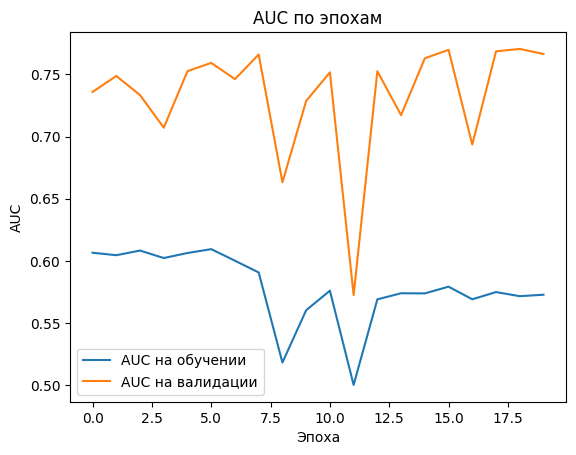

In [55]:
plt.plot(history.history['AUC'], label='AUC на обучении')
plt.plot(history.history['val_AUC'], label='AUC на валидации')
plt.title('AUC по эпохам')
plt.xlabel('Эпоха')
plt.ylabel('AUC')
plt.legend()
plt.show()

In [56]:
val_loss, val_auc = model.evaluate(X_val, y_val)
print(f'Потери на валидации: {val_loss}, AUC на валидации: {val_auc}')

637/637 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - AUC: 0.7679 - loss: 0.5777
Потери на валидации: 0.5803431272506714, AUC на валидации: 0.7663553357124329
